# 2.3.3 데이터 구조 훑어보기

In [7]:
housing = pd.read_csv('/Users/hayeon/Downloads/housing.csv')
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


> ## **ocean_proximity**
  - 데이터를 CSV 파일에서 읽었기 때문에 object 형식으로 나타나는데, 데이터 처음 5줄을 보면 객체형 데이터일 것이라고 추측가능하다.

In [10]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [11]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


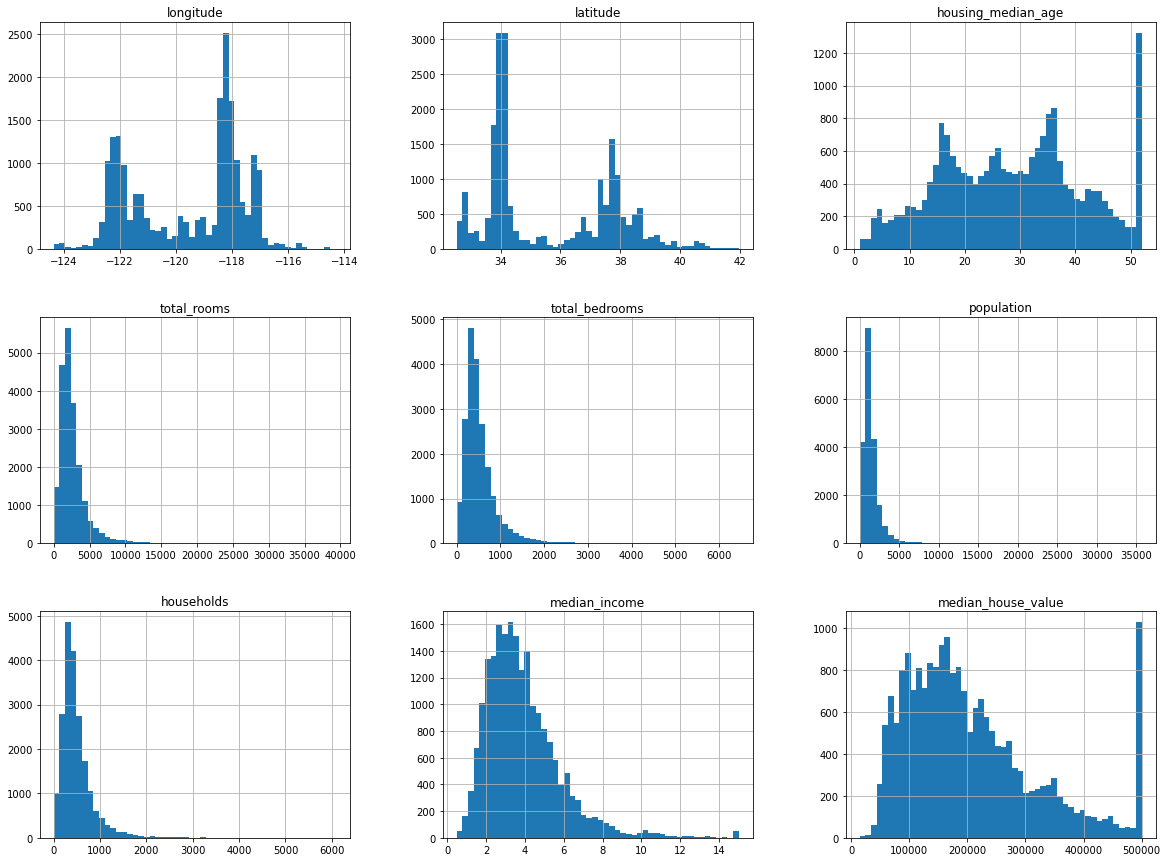

In [12]:
%matplotlib inline # matplotlib이 주피터 자체의 백엔드를 사용하도록 설정함

import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
plt.show()

> **median_income**
   - 단위가 US달러로 표현되어있지 않은 상태. 

> **housing median age , median house value**
   - 그래프가 끝의 막대가 가장 높은 것으로 보아 최댓값, 최솟값을 한정해놓은 컬럼일 것이라고 추측한다. 
        * 이러한 값들은 일부 머신러닝 알고리즘에서 패턴을 찾기 어렵게 한다. 때문에 전처리가 필요하다

# 2.3.4 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**pd.cut() 함수를 활용해 카테고리 5개를 가진 소득 카테고리 특성을 만든다. 카테고리 1은 0 ~ 1.5, 2는 1.5 ~ 3 )**

In [20]:
import numpy as np

housing['income_cat'] = pd.cut(housing['median_income'],
                              bins=[0, 1.5, 3.0, 4.5, 6., np.inf],
                              labels=[1, 2, 3, 4, 5])

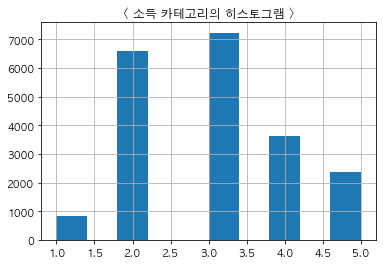

In [24]:
plt.rcParams['font.family'] = 'AppleGothic' # 한글 보이게 함

housing['income_cat'].hist()
plt.title('< 소득 카테고리의 히스토그램 >')
plt.show()

# StratifiedShuffleSplit
  * **StratifiedKFlod의 계층 샘플링 + ShuffleSplit의 랜덤 샘플링**
        - 소득 카테고리를 기반으로 계층샘플링

In [28]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [29]:
strat_test_set['income_cat'].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

* --> 테스트세트에서 소득카테고리의 비율

In [30]:
# income_cat 상태를 삭제해서 데이터를 원래상태로 되돌리자. 
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis=1, inplace=True)

# 2.4 데이터 이해를 위한 탐색과 시각화

In [31]:
housing = strat_train_set.copy() # 훈련셋 건들지 않고 EDA 하기 위해 복사본

## 2.4.1 지리적 데이터 시각화

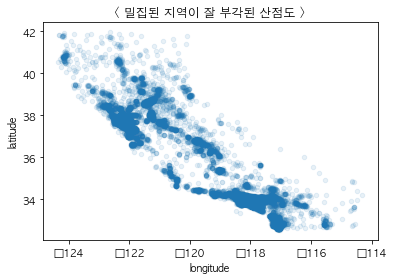

In [34]:
housing.plot(kind='scatter', x = 'longitude', y='latitude', alpha=0.1)
plt.title('< 밀집된 지역이 잘 부각된 산점도 >')
plt.show()

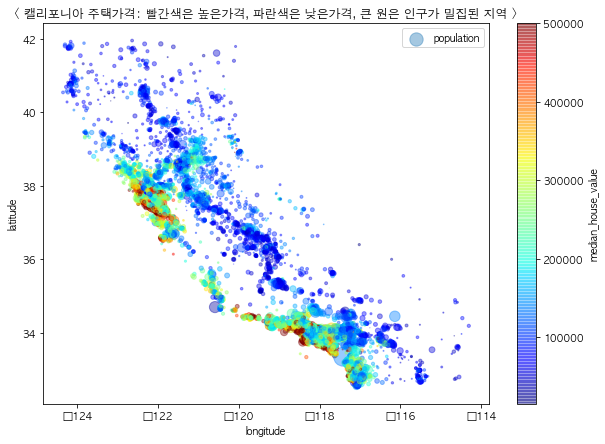

In [36]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
            s = housing['population']/100, label='population', figsize=(10, 7),
            c = 'median_house_value', cmap=plt.get_cmap('jet'), colorbar=True,
            sharex=False)
plt.legend()
plt.title("< 캘리포니아 주택가격: 빨간색은 높은가격, 파란색은 낮은가격, 큰 원은 인구가 밀집된 지역 >")
plt.show()

**주택가격은 지역과 인구밀도에 관련이 매우 크다. --> 군집 알고리즘을 사용해 주요 군집을 찾고 중심까지의 거리를 재는 특성을 추가할 수 있다.**


# 2.4.2 상관관계 조사

In [37]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

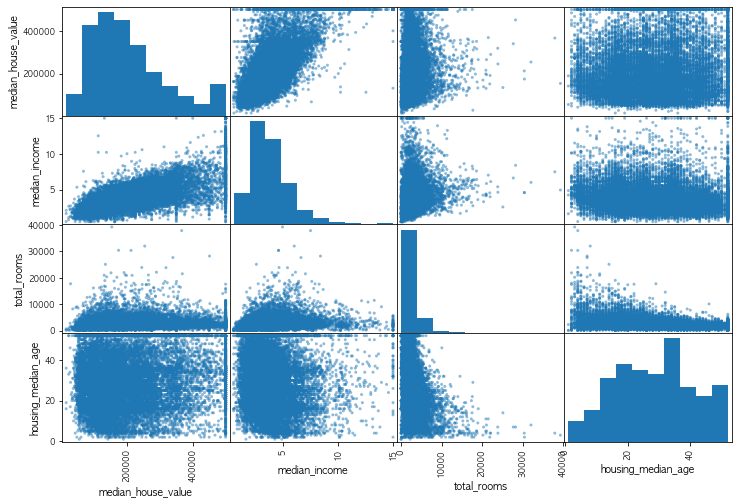

In [38]:
# median_house_value와 상관관계가 높아보이는 특성 몇개만 살펴보자. 
from pandas.plotting import scatter_matrix

attributes=['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize=(12, 8))

> ## **그래프 설명**
1. 우하향 대각선은 변수 자기자신에 대한 그래프 (의미없다.)
2. median_house_value를 예측하는 데 유용할 것 같은 특성은 median_income이다. (그래프가 어느정도 패턴을 갖는 듯 함. (우상향))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

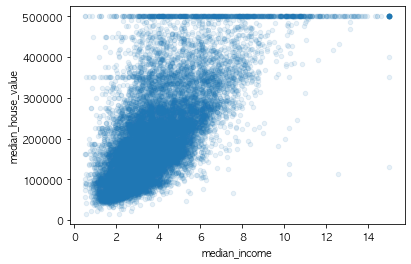

In [39]:
# median_house_value와 median_income 상관관계 산점도 확대 
housing.plot(kind='scatter', x='median_income', y='median_house_value',
            alpha=0.1)

< median_house_value - median_income >
1. 상관관계 매우 강함
2. 수평선 구역이 두세개정도 존재하는데 해당 구역 제거해야 한다.

# 2.4.3 특성 조합
1. 가구 당 방 개수 컬럼추가 
2. 가구 당 침실 개수 컬럼추가 
3. 가구 당 인원 명수 컬럼추가

In [40]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [41]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

* bedrooms_per_room 특성이 전체 방 개수, 침실개수보다 median_house_value와의 상관관계가 높다. 
* 침실/방의 비율이 낮은 집은 더 비싼 경향이 있다. 


# 2.5 머신러닝 알고리즘을 위한 데이터 준비 

In [42]:
housing = strat_train_set.drop('median_house_value', axis=1)
housing_labels = strat_train_set['median_house_value'].copy()

# 2.5.1 데이터 정제
1. total_bedrooms 
    - Option1. 결측행 제거? 
    - Option2. 컬럼삭제? 
    - Option3. 결측치 대체? 

> ## *Option1*
**housing.dropna(subset=['total_bedrooms'])**

> ## *Option2*
**housing.drop('total_bedrooms', axis=1)**

> ## *Option3*
**median = housing['total_bedrooms'].median()**
**housing['total_bedrooms'].fillna(median, inplace=True)**

## SimpleImputer 
**누락된 값을 손쉽게 다루도록 한다.**

In [43]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

In [44]:
housing_num = housing.drop('ocean_proximity', axis=1)

In [45]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

* -> 각 특성의 중간값을 계산해서 그 결과를 객체의 statistics_ 속성에 저장
* 모든 수치형 특성에 imputer를 적용하는 것이 바람직함

In [46]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [47]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [48]:
X = imputer.transform(housing_num)

In [49]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                         index=housing_num.index)

# 2.5.2 텍스트와 범주형 특성 다루기

In [50]:
housing_cat = housing['ocean_proximity']
housing_cat.head(10)

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
19480        INLAND
8879      <1H OCEAN
13685        INLAND
4937      <1H OCEAN
4861      <1H OCEAN
Name: ocean_proximity, dtype: object

* **텍스트에서 숫자로 변환하자. -> OrdinalEncoder 클래스 사용**

In [60]:
from sklearn.preprocessing import OrdinalEncoder

housing_cat = np.array(housing_cat).reshape(-1,1)

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [61]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## OneHotEncoder 
* 컬럼의 값 종류개수만큼 컬럼을 만들고 행 당 있던 값의 컬럼에 1을 표기하고 다른 컬럼엔 0을 표기한다. 
    * 이 컬럼에 해당하는 값이 존재했었어! 라고 표시해준다고 생각하면 편하다.
   

In [63]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [65]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [64]:
housing_cat = np.array(housing_cat).reshape(-1,1)

In [66]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

# 2.5.3 나만의 변환기!

In [67]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

* 변환기가 add_bedrooms_per_room 하이퍼파라미터 하나를 가지고 기본값을 True로 지정. 


# 2.5.4 특성 스케일링
1. MinMaxScaler 
2. StandardScaler

# 2.5.5 변환 파이프라인 
* 연속된 변환을 순서대로 처리하도록 한다

In [68]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

< Pipeline >
1. 연속된 단계를 나타내는 이름/추정기 쌍의 목록을 입력으로 받는다. 마지막 단계에는 변환기와 추정기를 모두 사용할 수 있고 그 외에는 모두 변환기여야 한다. (즉, fit_transform() 메소드를 가져야 한다.)
2. 파이프라인의 fit() 메서드를 호출하면 모든 변환기의 fit_transform() 메서드를 순서대로 호출하면서 한 단계의 출력을 다음 단계의 입력으로 전달한다. 마지막 단계에서는 fit() 메서드만 호출함. 
3. 파이프라인 객체는 마지막 추정기와 동일한 메서드를 제공한다. 위 코드에서는 마지막 변환기가 StandardScaler이므로, 파이프라인이 데이터에 대해 모든 변환을 순서대로 적용하는 transform() 메서드를 갖고있다. ( + fit_transform() 메서드도 가진다.)

## ColumnTransformer
* 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리하도록 한다.

In [69]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num) # 수치형 열 이름 리스트
cat_attribs = ['ocean_proximity'] # 범주형 열 이름 리스트

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
])

housing_prepared = full_pipeline.fit_transform(housing)

* 수치형 열은 num_pipeline으로 변환됨. 
* 범주형 열은 OneHotEncoder을 사용해 변환되어야 함. 
    - ColumnTransformer를 주택 데이터에 적용 
    

# 2.6 모델 선택과 훈련
## 2.6.1 훈련 세트에서 훈련하고 평가하기

In [72]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [73]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print('predict: ', lin_reg.predict(some_data_prepared))

predict:  [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [74]:
print('label: ', list(some_labels))

label:  [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


In [75]:
from sklearn.metrics import mean_squared_error

housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

> ### **-> 과소적합**
> ### **더 복잡한 모델이 필요하다. DecisionTreeRegressor 도전**

In [76]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [77]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

> ### **과대적합** 
> ### **오차율 0? 말도 안돼**


# 2.6.2 교차검증을 사용한 평가 
- DecisionTreeRegressor를 평가하는 방법? 
    * **K-fold cross validation**
        * cv 개수만큼 서브셋을 만든다. 그 개수만큼의 훈련을 진행한다. 즉, 10개의 평가점수가 나오게 된다

In [78]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, 
                        scoring='neg_mean_squared_error', cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [79]:
def display_scores(scores):
    print("점수 :", scores)
    print('평균 :', scores.mean())
    print('표준편차 :', scores.std())
    
display_scores(tree_rmse_scores)

점수 : [69105.18479751 66141.38903338 70945.68820939 69636.53787564
 69529.59421886 74803.92751843 71292.42443196 71132.45914116
 75814.78717089 69989.23579982]
평균 : 70839.12281970403
표준편차 : 2640.8033665700727


> **선형회귀모델보다 나쁘다.** 


In [80]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수 : [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
평균 : 69052.46136345083
표준편차 : 2731.6740017983507


> ## **결정트리모델이 과대적합되어 선형회귀모델보다 성능이 나쁘다**

### RandomForestRegressor

In [82]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor()

In [86]:
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                            scoring='neg_mean_squared_error', cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

점수 : [49501.45825842 48050.91734404 49812.75075198 52471.19782419
 49453.71362552 53694.64031931 48616.89445014 48499.60468785
 52726.90135574 50423.21550977]
평균 : 50325.12941269715
표준편차 : 1867.0919099896255


* 매우 훌륭 
* 훈련셋에 대한 점수가 검증셋에 대한 점수보다 훨씬 낮기 때문에, 과대적합되어있다. 
* 모델을 간단히 하거나, 규제하거나, 훈련데이터를 더 많이 모으자. 

# 2.7 모델 세뷰 튜닝
## 2.7.1 그리드 탐색

In [88]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators' : [3, 10], 'max_features':[2, 3, 4]},
]

forest_reg = RandomForestRegressor()

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring='neg_mean_squared_error',
                          return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

* n_estimators와 max_features 하이퍼파라미터의 조합인 3 * 4 = 12개를 평가하고, 다음 2 * 3 = 6 시도
* 하지만 두번째 bootstrap 하이퍼파라미터를 True (기본값)가 아닌, False
* 모두 합하면, 18개 조합을 탐색하고, 각각 5번 모델 훈련시킨다. 
* 즉, 18 * 5 = 90번 훈련한다.

In [89]:
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [90]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [91]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres['params']):
    print(np.sqrt(-mean_score), params)

64726.68710992301 {'max_features': 2, 'n_estimators': 3}
55689.63305900602 {'max_features': 2, 'n_estimators': 10}
52991.1353332709 {'max_features': 2, 'n_estimators': 30}
60485.46263016041 {'max_features': 4, 'n_estimators': 3}
52817.619823146495 {'max_features': 4, 'n_estimators': 10}
50563.349030999794 {'max_features': 4, 'n_estimators': 30}
59166.698902419885 {'max_features': 6, 'n_estimators': 3}
51795.25887814158 {'max_features': 6, 'n_estimators': 10}
49935.055534441 {'max_features': 6, 'n_estimators': 30}
58998.513893846444 {'max_features': 8, 'n_estimators': 3}
51834.59804285129 {'max_features': 8, 'n_estimators': 10}
50025.28909188153 {'max_features': 8, 'n_estimators': 30}
62569.17000833793 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54477.653545584326 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60600.85139858688 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52517.6442815444 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

### max_features = 6, n_estimators = 30일 때 최적의 모델

# 2.7.2 랜덤 탐색
- Grid 탐색은 적은 수의 조합을 탐구할 때 적합. 
- 하이퍼파라미터 탐색공간 커지면 RandomizedSearchCV를 사용하는 것이 더 적합
- Grid와 거의 같은 방식으로 사용하지만 가능한 모든 조합을 시도하는 대신 각 반복마다 하이퍼파라미터에 임의의 수를 대입하여 지정한 횟수만큼 평가. 

< RandomizedSearchCV 장점 >
1. 랜덤탐색을 1000회 반복하도록 실행하면 하이퍼파라미터마다 각기 다른 1000개의 값을 탐색한다. (Grid에서는 하이퍼파라미터마다 몇개의 값만 탐색함)
2. 단순히 반복횟수를 조절하는 것만으로 하이퍼파라미터 탐색에 투입할 컴퓨팅 자원 제어가능

# 2.7.3 앙상블 방법 
- 모델 튜닝 방법 중 하나로 최상의 모델을 연결하는 것. 
- ex. 여러개의 결정트리를 합친 랜덤포레스트 
- 앙상블 방법이 단일모델보다 더 나은 성능을 보이는 경우가 많다. 

# 2.7.4 최상의 모델과 오차 분석
- 최상의 모델을 분석하면 주제에 대한 통찰 얻을 수 있다. 

In [92]:
feature_importance = grid_search.best_estimator_.feature_importances_
feature_importance

array([7.54566624e-02, 7.33982622e-02, 4.25247530e-02, 1.77549631e-02,
       1.71045555e-02, 1.77206613e-02, 1.67268803e-02, 3.23839863e-01,
       5.95140301e-02, 1.06632749e-01, 7.95979735e-02, 8.83593533e-03,
       1.55087251e-01, 5.49288027e-05, 2.13199994e-03, 3.61853122e-03])

### **-> 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도 보여준다**

In [93]:
extra_attribs = ['rooms_per_hhold', 'pop_per_hhold', 'bedrooms_per_room']
cat_encoder = full_pipeline.named_transformers_['cat']
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importance, attributes), reverse=True)

[(0.3238398631959629, 'median_income'),
 (0.15508725118295547, 'INLAND'),
 (0.10663274904608189, 'pop_per_hhold'),
 (0.07959797352482073, 'bedrooms_per_room'),
 (0.0754566623546473, 'longitude'),
 (0.07339826223920977, 'latitude'),
 (0.05951403005704489, 'rooms_per_hhold'),
 (0.042524752953501214, 'housing_median_age'),
 (0.017754963073980317, 'total_rooms'),
 (0.017720661295958232, 'population'),
 (0.017104555457598262, 'total_bedrooms'),
 (0.01672688033206193, 'households'),
 (0.008835935331191319, '<1H OCEAN'),
 (0.0036185312160296104, 'NEAR OCEAN'),
 (0.002131999936216744, 'NEAR BAY'),
 (5.4928802739460224e-05, 'ISLAND')]

> ### **이 정보를 바탕으로 덜 중요한 특성을 걸러낼 수 있다.**


# 2.7.5 테스트 세트로 시스템 평가하기 
- 이제 최종 모델을 평가하자 
- 테스트셋에서 예측변수, 레이블을 뽑아내고 full_pipeline을 활용해서 데이터 변환하고 테스트셋에서 최종모델평가

In [94]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop('median_house_value', axis=1)
y_test = strat_test_set['median_house_value'].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

- 현재 모델보다 0.1 높으면? 
    * 이 추정값이 얼마나 정확한지 궁금해 -> scipy.stats.t.interval()로 일반화 오차의 95% 신뢰구간 계산할 수 있다

In [96]:
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                           loc = squared_errors.mean(),
                           scale = stats.sem(squared_errors)))

array([46135.33631964, 50189.32310141])

- 하이퍼파라미터 튜닝을 많이 햇다면, 교차검증을 사용한 경우보다 성능이 낮은 것이 보통. 
    * 검증 데이터에서 좋은 성능을 내도록 세밀하게 튜닝되었기 때문에 새로운 데이터셋에서는 잘 작동하지 않을 가능성 크다.
    * 위 경우에서는 성능 낮아지지 않았지만, 만약 낮아지더라도 성능 높이기 위한 하이퍼파라미터 튜닝은 지양하자.
        * -> 새로운 데이터에 일반화되기 어렵다.
        